In [4]:
import tensorflow as tf
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

### Extract the data from the csv

In [6]:
raw_csv_data = np.loadtxt('diabetes_binary_health_indicators_BRFSS2021.csv',delimiter=',', skiprows=1, encoding = 'utf-8')

In [7]:
# contains all the data with the exception of the targets
unscaled_inputs = raw_csv_data[:,1:]
# contains only the targets
targets = raw_csv_data[:,0:1]

### Balance the dataset

In [8]:
num_one_targets = int(np.sum(targets))

zero_targets_counter = 0

indices_to_remove = []

for i in range(targets.shape[0]):
    if targets[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)

# Create two new variables, one that will contain the inputs, and one that will contain the targets.
# We delete all indices that we marked "to remove" in the loop above.
balanced_inputs = np.delete(unscaled_inputs, indices_to_remove, axis=0)
balanced_targets = np.delete(targets, indices_to_remove, axis=0)

zero_targets_counter = 0
one_targets_counter = 0
two_targets_counter = 0
datasetSize = balanced_targets.shape[0]

for i in range(balanced_targets.shape[0]):
    if balanced_targets[i] == 0:
        zero_targets_counter += 1
    elif balanced_targets[i] == 1:
        one_targets_counter += 1
    elif balanced_targets[i] == 2:
        two_targets_counter += 1

print("Percent of people with no diabetes: ", zero_targets_counter/datasetSize*100)
print("Percent of people with diabetes: ", one_targets_counter/datasetSize*100)
# print("Percent of people with type two diabetes: ", two_targets_counter/datasetSize*100)

Percent of people with no diabetes:  50.0
Percent of people with diabetes:  50.0


### Standardize Inputs

In [9]:
scaled_inputs = preprocessing.scale(balanced_inputs)
print(scaled_inputs)

[[-1.09095988  1.00068541  0.15863454 ...  0.82656736 -1.06362948
  -0.64861212]
 [ 0.91662399 -0.99931506  0.15863454 ...  0.82656736 -1.06362948
  -1.45728891]
 [ 0.91662399  1.00068541  0.15863454 ...  0.17638486 -1.06362948
   0.16006467]
 ...
 [ 0.91662399  1.00068541  0.15863454 ... -0.14870639  0.95132097
  -0.24427373]
 [ 0.91662399  1.00068541  0.15863454 ...  0.50147611 -1.06362948
  -0.64861212]
 [ 0.91662399  1.00068541  0.15863454 ...  0.50147611 -3.07857993
  -1.45728891]]


### Shuffle and Split the dataset into train, validation, and test

In [10]:
from sklearn.model_selection import train_test_split
train_targets , validation_targets, train_inputs , validation_inputs = train_test_split(balanced_targets,balanced_inputs, test_size=0.2, random_state=42, shuffle =True)

In [11]:
train_targets , test_targets, train_inputs , test_inputs = train_test_split(train_targets,train_inputs, test_size=0.125, random_state=42, shuffle =True)

In [12]:
print("train_inputs shape: ", train_inputs.shape)
print("train_targets shape: ", train_targets.shape)
print()
print("test_inputs shape: ", validation_inputs.shape)
print("test_targets shape: ", validation_targets.shape)
print()
print("test_inputs shape: ", test_inputs.shape)
print("test_targets shape: ", test_targets.shape)

train_inputs shape:  (46994, 21)
train_targets shape:  (46994, 1)

test_inputs shape:  (13428, 21)
test_targets shape:  (13428, 1)

test_inputs shape:  (6714, 21)
test_targets shape:  (6714, 1)


### Machine Learning Model

In [13]:
import keras
# # Set the input and output sizes
input_size = 2
output_size = 2
# Use same hidden layer size for both hidden layers
hidden_layer_size = 25

# define how the model will look
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='tanh'), # 2nd hidden layer
    # For the final layer must make sure to activate it with softmax as this is a classification problem
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choose the optimizer and the loss function
# Define optimizer, loss function, and the metrics we're interested in obtaining at each iteration
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='AdaGrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training
# set the batch size
batch_size = 50
# set a maximum number of training epochs
max_epochs = 100

# early stopping mechanism; set to 4 to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=4)

# fit the model
# note: train, validation and test data are not iterable here
history = model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs trained for (assuming early stopping doesn't occur)
          callbacks=[early_stopping], # early stopping, checks if validation loss is increasing
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # determines amount of info returned during training process
          )

Epoch 1/100
940/940 - 3s - loss: 0.7838 - accuracy: 0.5120 - val_loss: 0.6781 - val_accuracy: 0.5426 - 3s/epoch - 3ms/step
Epoch 2/100
940/940 - 3s - loss: 0.6692 - accuracy: 0.5719 - val_loss: 0.6616 - val_accuracy: 0.5740 - 3s/epoch - 3ms/step
Epoch 3/100
940/940 - 2s - loss: 0.6505 - accuracy: 0.6112 - val_loss: 0.6421 - val_accuracy: 0.6323 - 2s/epoch - 2ms/step
Epoch 4/100
940/940 - 2s - loss: 0.6341 - accuracy: 0.6564 - val_loss: 0.6273 - val_accuracy: 0.6653 - 2s/epoch - 2ms/step
Epoch 5/100
940/940 - 2s - loss: 0.6212 - accuracy: 0.6742 - val_loss: 0.6164 - val_accuracy: 0.6823 - 2s/epoch - 2ms/step
Epoch 6/100
940/940 - 2s - loss: 0.6110 - accuracy: 0.6845 - val_loss: 0.6075 - val_accuracy: 0.6853 - 2s/epoch - 2ms/step
Epoch 7/100
940/940 - 2s - loss: 0.6030 - accuracy: 0.6901 - val_loss: 0.6009 - val_accuracy: 0.6863 - 2s/epoch - 2ms/step
Epoch 8/100
940/940 - 2s - loss: 0.5973 - accuracy: 0.6935 - val_loss: 0.5960 - val_accuracy: 0.6895 - 2s/epoch - 2ms/step
Epoch 9/100
940/

### Test the model

In [14]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100))

210/210 [==============================] - 1s 2ms/step - loss: 0.5231 - accuracy: 0.7377

Test loss: 0.52. Test accuracy: 73.77%


### Evaluate the Model

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                550       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 2)                 52        
                                                                 
Total params: 1252 (4.89 KB)
Trainable params: 1252 (4.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


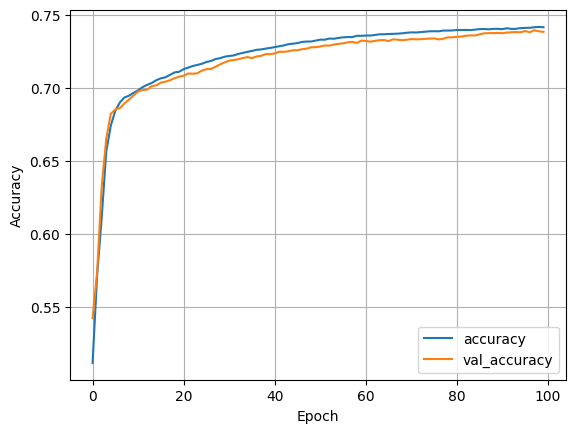

In [16]:
# evaluate the model
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()